In [1]:
# Analyse van +5000 IMDB geregistreerde films voor data mining

# dataset gedownload van https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset
# 5043 films met elk 26 variabelen :
# "movie_title" "color" "num_critic_for_reviews" "movie_facebook_likes" "duration" "director_name" "director_facebook_likes" 
# "actor_3_name" "actor_3_facebook_likes" "actor_2_name" "actor_2_facebook_likes" "actor_1_name" "actor_1_facebook_likes" 
# "gross" "genres" "num_voted_users" "cast_total_facebook_likes" "facenumber_in_poster" "plot_keywords" "movie_imdb_link" 
# "num_user_for_reviews" "language" "country" "content_rating" "budget" "title_year" "imdb_score" "aspect_ratio"
# niet correct meer ! ^^^^^^^^^

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from collections import Counter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import urllib as f


raw_movie_data = sc.textFile('./movie_metadata.csv')
movie_count = raw_movie_data.count()
print movie_count

5044


In [2]:
header = raw_movie_data.first() #extract header
raw_movie_data = raw_movie_data.filter(lambda x: x != header)
keywords = header.split(',')
print keywords

[u'color', u'director_name', u'num_critic_for_reviews', u'duration', u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name', u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name', u'movie_title', u'num_voted_users', u'cast_total_facebook_likes', u'actor_3_name', u'facenumber_in_poster', u'plot_keywords', u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country', u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes', u'imdb_score', u'aspect_ratio', u'movie_facebook_likes']


In [131]:
movie_data = raw_movie_data.map(lambda x: x.split(","))
tags_data = movie_data.map(lambda x: x[16])
tags_data = tags_data.map(lambda x: x.split('|'))
counter_tags_json = tags_data.map(Counter).reduce(lambda x, y: x + y)

print(counter_tags_json)

In [132]:
c = counter_tags_json.most_common()
plot_keywords = []
tags_amount = []

for a, b in c:
    plot_keywords.append(str(a))
    tags_amount.append(b)

print(plot_keywords)

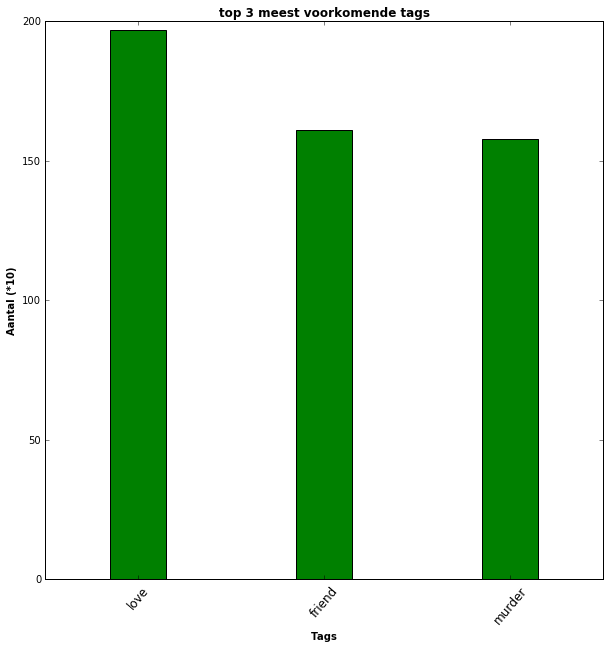

In [139]:
y = tags_amount[:3]
x = np.arange(3)
labels = plot_keywords[:3]

fig = plt.figure(figsize=(10, 10))
plt.title("top 3 meest voorkomende tags", fontweight="bold")
plt.bar(x,y,width=0.3,color="green",align="center")
plt.xticks(x , labels, rotation=50, fontsize=12)
plt.ylabel("Aantal (*10)", fontweight="bold")
plt.xlabel("Tags", fontweight="bold")
#ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

In [81]:
movie_data = raw_movie_data.map(lambda x: x.split(","))
director_data = movie_data.map(lambda x: x[1])
director_data = director_data.map(lambda x: x.split(";"))
director_data = director_data.filter(lambda x: len(x)>0)
counter_director_json = director_data.map(Counter).reduce(lambda x, y: x + y)

print(counter_director_json)

In [58]:
c = counter_director_json.most_common()
director_name = []
director_amount = []

for a, b in c:
    director_name.append(str(a).encode('utf-8').strip())
    director_amount.append(b)

print(director_name)

In [30]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [82]:
c = counter_director_json.most_common()
director_name = []
director_amount = []

for a, b in c:
    director_name.append(str(a))
    director_amount.append(b)

print(director_name)

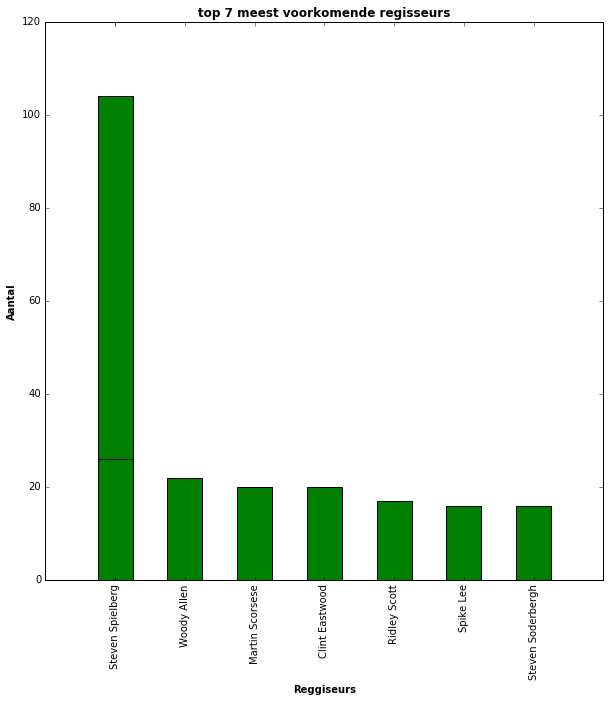

In [129]:
y= director_amount[:8]
x[1:8]= np.arange(7)
labels = director_name[:8]

fig = plt.figure(figsize=(10, 10))
plt.title("top 7 meest voorkomende regisseurs", fontweight="bold")
plt.bar(x,y,width=0.5,color="green",align="center")
plt.xticks(x[0:8], labels, rotation=90, fontsize=10)
plt.ylabel("Aantal", fontweight="bold")
plt.xlabel("Reggiseurs", fontweight="bold")
#ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

In [135]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

d = path.dirname(__file__)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open("a_new_hope.txt").read()

# preprocessing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors)
plt.axis("off")
plt.show()


ImportError: No module named query_integral_image

In [141]:
from wordcloud import WordCloud

ImportError: No module named query_integral_image

In [2]:
from wordcloud import WordCloud

ImportError: No module named wordcloud

In [3]:
newRDD = sc.parallelize([(3, 'monster', 4), (4, 'minions 3D', 5)])
top_n = 10
newRDD.top(top_n, key=lambda items: items[2])


[(4, 'minions 3D', 5), (3, 'monster', 4)]

In [6]:
import heapq
 
def takeOrderedByKey(self, num, sortValue = None, reverse=False):
 
        def init(a):
            return [a]
 
        def combine(agg, a):
            agg.append(a)
            return getTopN(agg)
 
        def merge(a, b):
            agg = a + b
            return getTopN(agg)
 
        def getTopN(agg):
            if reverse == True:
                return heapq.nlargest(num, agg, sortValue)
            else:
                return heapq.nsmallest(num, agg, sortValue)              
 
        return self.combineByKey(init, combine, merge)
 
 
# Create some fake student dataset. The objective is to use identify top 2 
# students in each class based on GPA scores. 
data = raw_movie_data
 
# Add takeOrderedByKey function to RDD class 
from pyspark.rdd import RDD
RDD.takeOrderedByKey = takeOrderedByKey
 
# Load dataset
rdd1 = sc.parallelize(data).map(lambda x: (x[0], x))
 
# extract top 2 records in each class ordered by GPA in descending order
for i in rdd1.takeOrderedByKey(2, sortValue=lambda x: x[2], reverse=True).flatMap(lambda x: x[1]).collect():
    print i

TypeError: 'RDD' object is not iterable

In [7]:
from pyspark.mllib.linalg import DenseVector
from pyspark.mllib.regression import LabeledPoint